In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [19]:
df_movie_gross = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")

In [3]:
##Which factors are important:

##Title, studio, domestic gross and year

##Foreign_gross values have 1,350 null values - therefore, it doesn't make sense to factor this into our decision

In [20]:
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
df_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [21]:
df_movie_domgross = df_movie_gross.dropna(subset=['domestic_gross'])

In [22]:
df_movie_domgross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [14]:
df_movie_domgross.shape

(3359, 3)

In [23]:
df_movie_gross_cleaned = df_movie_domgross.drop(columns=['studio','foreign_gross'])

In [24]:
df_movie_gross_cleaned

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010
...,...,...,...
3382,The Quake,6200.0,2018
3383,Edward II (2018 re-release),4800.0,2018
3384,El Pacto,2500.0,2018
3385,The Swan,2400.0,2018


In [44]:
df_movie_gross_top10 = df_movie_gross_cleaned.head(10)

In [45]:
df_movie_gross_top10

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010
5,The Twilight Saga: Eclipse,300500000.0,2010
6,Iron Man 2,312400000.0,2010
7,Tangled,200800000.0,2010
8,Despicable Me,251500000.0,2010
9,How to Train Your Dragon,217600000.0,2010


In [26]:
df_movie_gross_cleaned.tail()

,title,domestic_gross,year
3382,The Quake,6200.0,2018
3383,Edward II (2018 re-release),4800.0,2018
3384,El Pacto,2500.0,2018
3385,The Swan,2400.0,2018
3386,An Actor Prepares,1700.0,2018


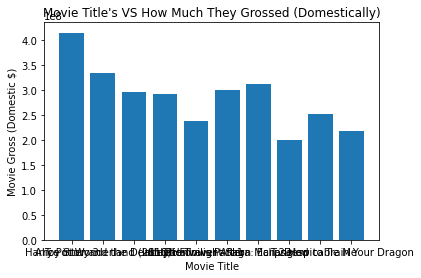

In [51]:
fig, ax = plt.subplots()

ax.bar(df_movie_gross_top10['title'], df_movie_gross_top10['domestic_gross'])

plt.title("Movie Title's VS How Much They Grossed (Domestically)")
plt.xlabel("Movie Title")
plt.ylabel("Movie Gross (Domestic $)");


In [4]:
df_tn_movie_budgets = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

In [5]:
df_tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
df_tn_movie_budgets_domgross = df_tn_movie_budgets.drop(columns=['worldwide_gross'])

In [7]:
df_tn_movie_budgets_domgross

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382"
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0


In [8]:
df_tn_movie_budgets_domgross.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
dtype: int64

In [ ]:
 ##      df2 = df.sort_values(['Courses', 'Discount'],
             ## ascending = [True, True])

In [9]:
def clean_domgross(row):
    if isinstance(row,str):
        domestic_gross = row.replace('$', '')
        domestic_gross = int(domestic_gross.replace(',', ''))
    else:
        domestic_gross = None
    return domestic_gross

In [10]:

df_tn_movie_budgets_domgross['domestic_gross'] = df_tn_movie_budgets_domgross['domestic_gross'].apply(clean_domgross)

In [11]:
df_tn_movie_budgets_domgross

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0
5778,79,"Apr 2, 1999",Following,"$6,000",48482
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0


In [12]:
df_tn_movie_budgets_domgross.sort_values('domestic_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000",936662225
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625
41,42,"Feb 16, 2018",Black Panther,"$200,000,000",700059566
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000",678815482
42,43,"Dec 19, 1997",Titanic,"$200,000,000",659363944
...,...,...,...,...,...
2709,10,"Mar 31, 2004",The Touch,"$20,000,000",0
2708,9,"Apr 13, 2010",Three Kingdoms: Resurrection of the Dragon,"$20,000,000",0
2707,8,"Dec 31, 2012",Zambezia,"$20,000,000",0
2706,7,"Dec 31, 2008",Admiral,"$20,000,000",0


In [13]:
def clean_prodbud(row):
    if isinstance(row,str):
        production_budget = row.replace('$', '')
        production_budget = int(production_budget.replace(',', ''))
    else:
        production_budget = None
    return production_budget

In [14]:

df_tn_movie_budgets_domgross['production_budget'] = df_tn_movie_budgets_domgross['production_budget'].apply(clean_domgross)

In [15]:
df_tn_movie_budgets_domgross.head(10)

,id,release_date,movie,production_budget,domestic_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295
9,10,"Nov 6, 2015",Spectre,300000000,200074175


In [17]:
df_tn_movie_budgets_head = df_tn_movie_budgets_domgross.head(10)

In [ ]:
## use the time method to parse through the above data

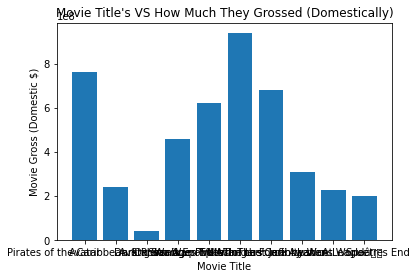

In [18]:
fig, ax = plt.subplots()

ax.bar(df_tn_movie_budgets_head['movie'], df_tn_movie_budgets_head['domestic_gross'])

plt.title("Movie Title's VS How Much They Grossed (Domestically)")
plt.xlabel("Movie Title")
plt.ylabel("Movie Gross (Domestic $)");